<a href="https://colab.research.google.com/github/upendarthota/ML-Projects/blob/main/Loan_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/ML /loan.csv')  # Make sure to use the correct path

# Check the first few rows and columns
print(df.head())
print(df.info())
print(df.describe())


    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

In [5]:
# Check for missing values
print(df.isnull().sum())

# Fill missing values (example: using mode for categorical and median for numerical)
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])

# If you have more missing values, handle them similarly


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [6]:
# Fill missing values for categorical columns
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])  # Most frequent value
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['Property_Area'] = df['Property_Area'].fillna(df['Property_Area'].mode()[0])

# Fill missing values for numerical columns
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())  # Mean value
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])  # Most frequent value
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])  # Most frequent value

# Check if there are still missing values
print(df.isnull().sum())


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [7]:
# Check if missing values have been handled
print(df.isnull().sum())

# Inspect the cleaned data
print(df.head())



Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64
    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0       128.0             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0           

In [8]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
labelencoder = LabelEncoder()

# Encoding columns: 'Gender', 'Married', 'Self_Employed', etc.
df['Gender'] = labelencoder.fit_transform(df['Gender'])
df['Married'] = labelencoder.fit_transform(df['Married'])
df['Self_Employed'] = labelencoder.fit_transform(df['Self_Employed'])
df['Property_Area'] = labelencoder.fit_transform(df['Property_Area'])
df['Dependents'] = df['Dependents'].apply(lambda x: 0 if x == '3+' else int(x))

# Check the encoded data
print(df.head())


    Loan_ID  Gender  Married  Dependents     Education  Self_Employed  \
0  LP001002       1        0           0      Graduate              0   
1  LP001003       1        1           1      Graduate              0   
2  LP001005       1        1           0      Graduate              1   
3  LP001006       1        1           0  Not Graduate              0   
4  LP001008       1        0           0      Graduate              0   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0       128.0             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History  Property_Area Loan_Status  
0             1.0              2           Y  
1             1.0              0        

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder  # Import LabelEncoder

# Define features (X) and target (y)
X = df.drop(columns=['Loan_ID', 'Loan_Status'])
y = df['Loan_Status']

# Initialize LabelEncoder
labelencoder = LabelEncoder()

# Encode 'Education' column
X['Education'] = labelencoder.fit_transform(X['Education'])  # Encode 'Education' column

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7642276422764228
              precision    recall  f1-score   support

           N       0.82      0.42      0.55        43
           Y       0.75      0.95      0.84        80

    accuracy                           0.76       123
   macro avg       0.79      0.68      0.70       123
weighted avg       0.78      0.76      0.74       123



<Axes: >

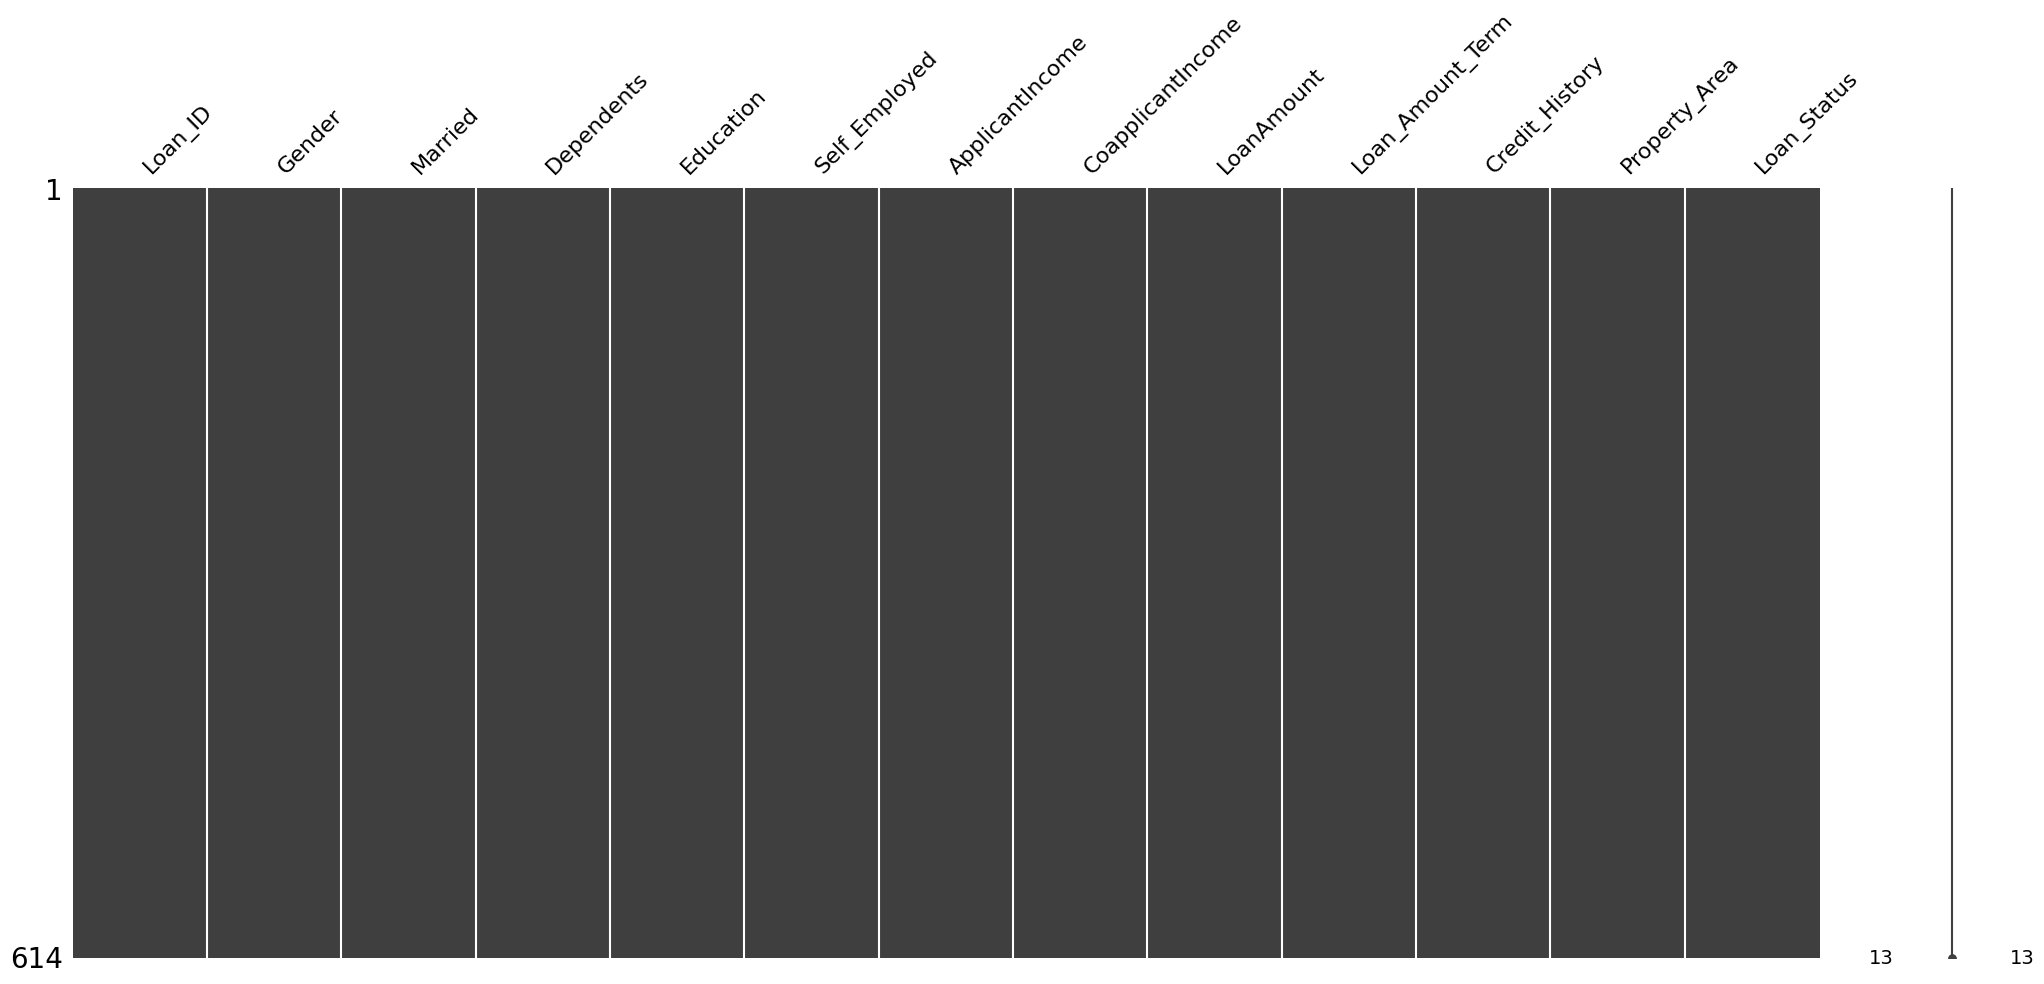

In [12]:
import missingno as msno

# Visualize missing data
msno.matrix(df)


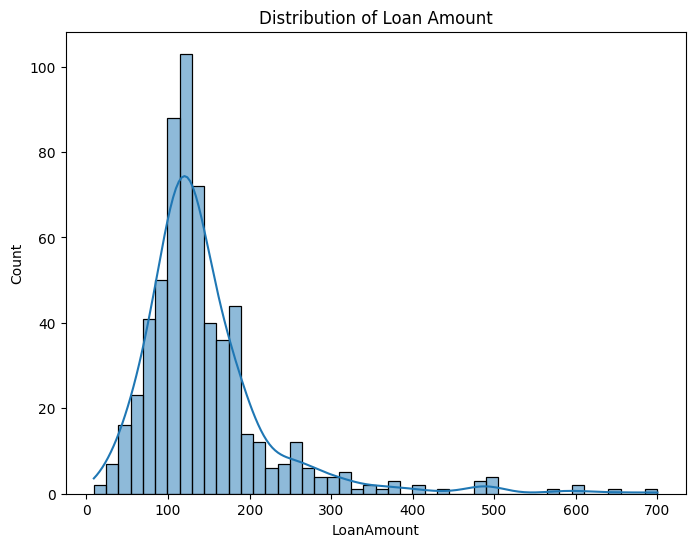

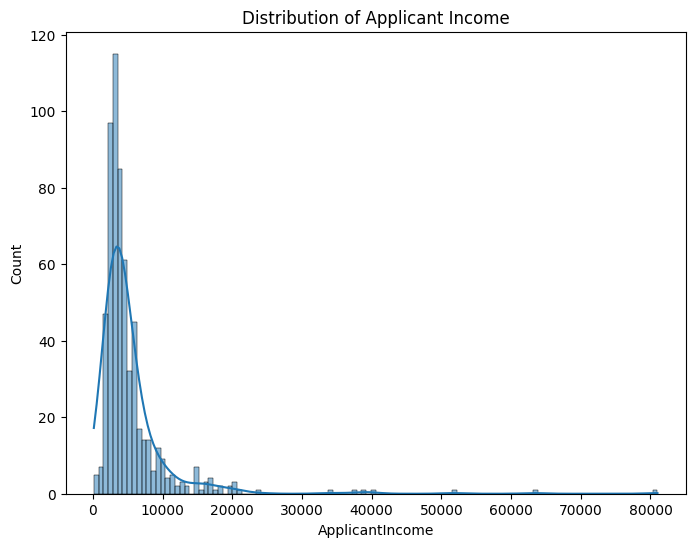

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of LoanAmount
plt.figure(figsize=(8, 6))
sns.histplot(df['LoanAmount'], kde=True)
plt.title('Distribution of Loan Amount')
plt.show()

# Plot the distribution of ApplicantIncome
plt.figure(figsize=(8, 6))
sns.histplot(df['ApplicantIncome'], kde=True)
plt.title('Distribution of Applicant Income')
plt.show()


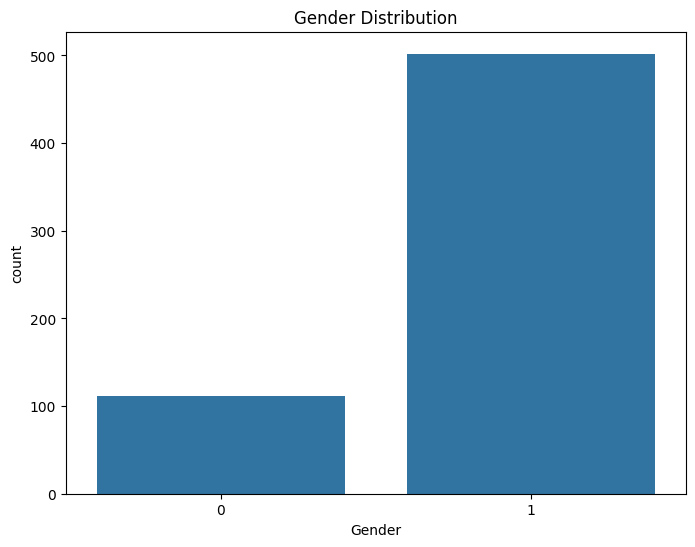

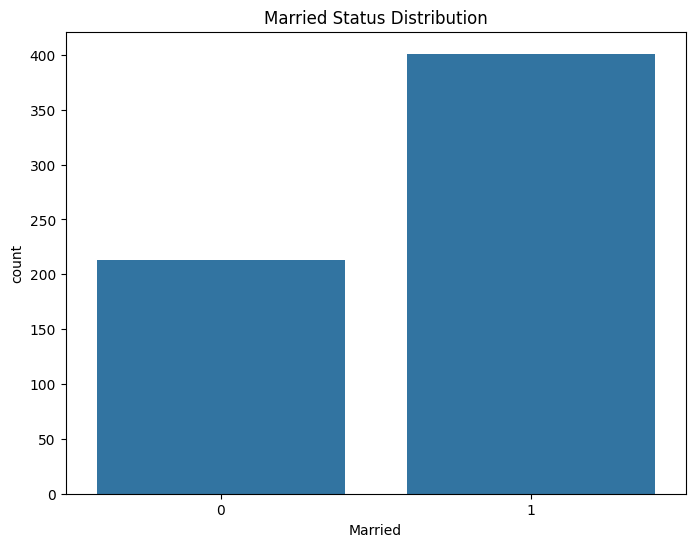

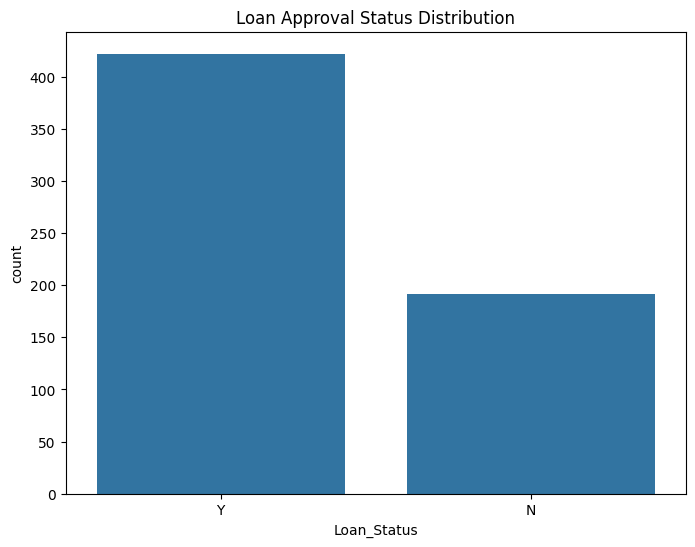

In [14]:
# Gender distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Gender')
plt.title('Gender Distribution')
plt.show()

# Married distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Married')
plt.title('Married Status Distribution')
plt.show()

# Loan_Status distribution (target variable)
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Loan_Status')
plt.title('Loan Approval Status Distribution')
plt.show()


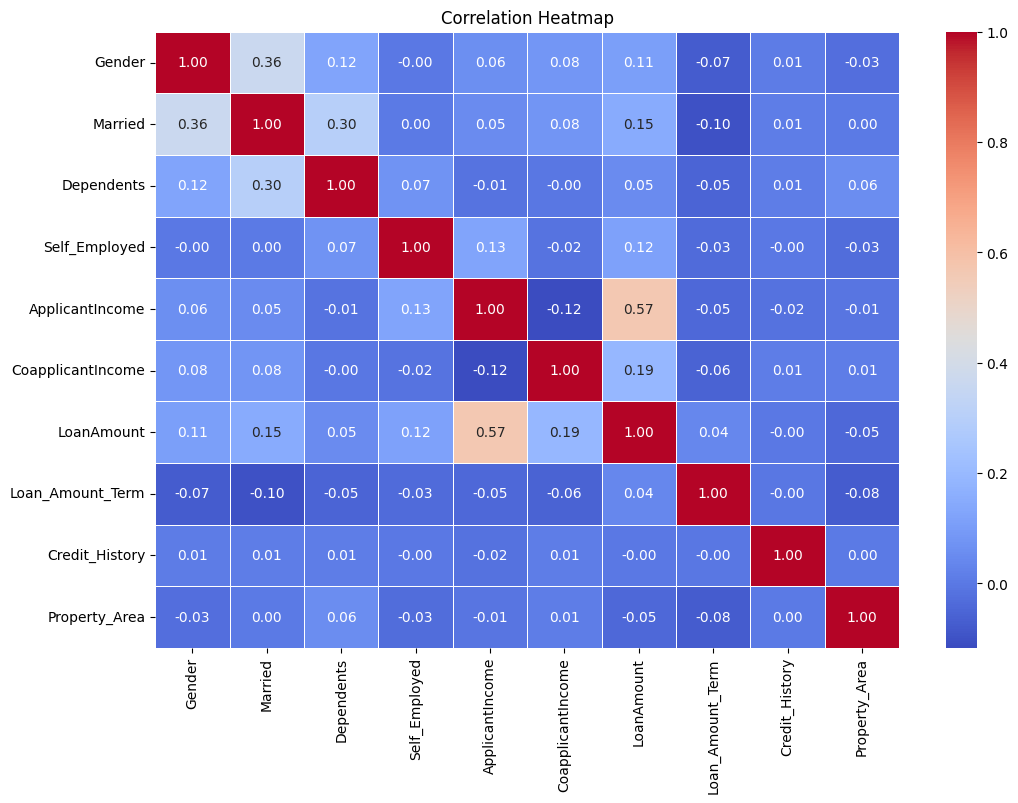

In [16]:
# # Correlation heatmap
# plt.figure(figsize=(12, 8))
# sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
# plt.title('Correlation Heatmap')
# plt.show()
# Correlation heatmap
plt.figure(figsize=(12, 8))
# Select only numerical features for correlation calculation
numerical_df = df.select_dtypes(include=['number'])
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

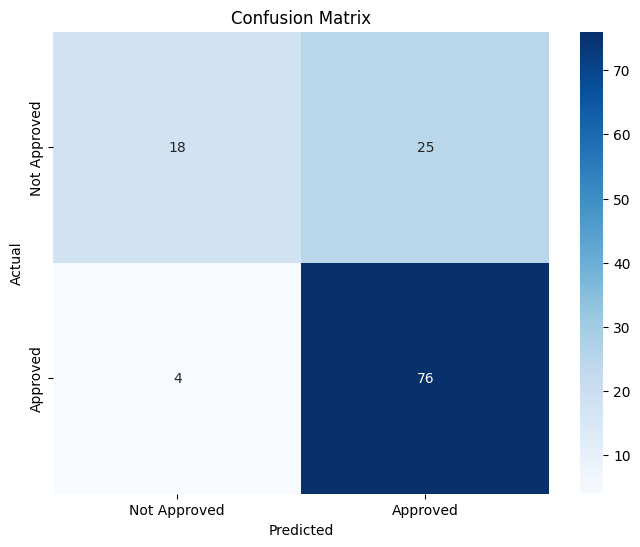

In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Approved', 'Approved'], yticklabels=['Not Approved', 'Approved'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


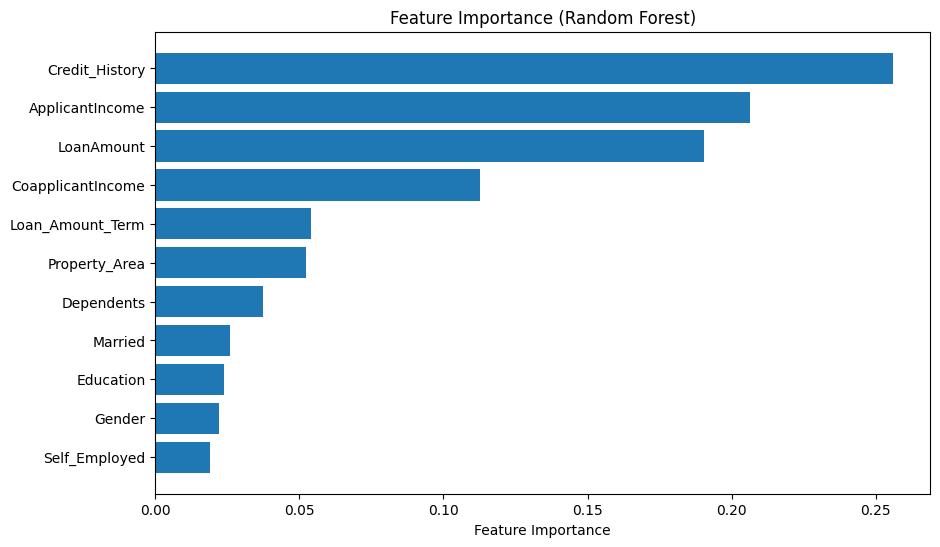

In [18]:
# Plotting feature importance
plt.figure(figsize=(10, 6))
importances = model.feature_importances_
features = X.columns

# Sort the features by importance
indices = importances.argsort()

# Plot the sorted feature importances
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel("Feature Importance")
plt.title("Feature Importance (Random Forest)")
plt.show()
